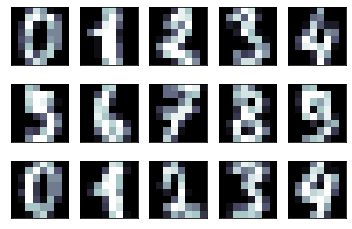

In [19]:
#项目10项目实施代码
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits #导入手写数字数据集
import matplotlib.pyplot as plt

x,y=load_digits().data,load_digits().target

#显示图片
fig,ax=plt.subplots(3,5) 
for i,axi in enumerate(ax.flat):
    axi.imshow(x[i].reshape(8,8),cmap='bone')
    axi.set(xticks=[],yticks=[])
plt.show()


In [8]:
#数据预处理
from sklearn.preprocessing import StandardScaler #导入数据预处理类

#训练集数据标准化处理
x=StandardScaler().fit_transform(x)

In [13]:
#训练与评估模型
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#拆分数据集
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2) #将数据集拆分为训练集与测试集
#模型训练
model=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',solver='sgd',learning_rate_init=0.001,max_iter=1000,random_state=1)
model.fit(x_train,y_train)
pred=model.predict(x_test)


#模型评估
re=classification_report(y_test,pred)
print('模型评估报告：')
print(re)

模型评估报告：
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.93      0.93      0.93        44
           2       1.00      0.97      0.98        31
           3       0.92      0.92      0.92        36
           4       0.97      0.86      0.91        35
           5       0.98      0.98      0.98        43
           6       1.00      0.97      0.99        35
           7       0.91      0.97      0.94        40
           8       0.82      0.92      0.87        36
           9       0.85      0.82      0.84        28

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.93       360
weighted avg       0.94      0.93      0.93       360



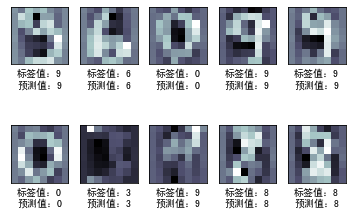

In [23]:
#显示分类结果
fig,ax=plt.subplots(2,5) #创建一个2行5列的画布
for i,axi in enumerate(ax.flat):
    t=np.random.randint(1,360)#生成随机整数t作为测试集的下标，可随机选取测试集中的图片
    axi.imshow(x_test[t].reshape(8,8),cmap='bone')#绘制图像
    axi.set(xticks=[],yticks=[])       
    axi.set_xlabel("标签值："+str(y_test[t])+"\n预测值："+str(pred[t])) #显示预测值与标签（真实）值
plt.rcParams['font.sans-serif']='Simhei'
plt.show()